# 📌 Customer Churn Prediction using Artificial Neural Network (ANN)

## 📝 Introduction

In the competitive banking industry, retaining existing customers is just as crucial as acquiring new ones. Customer churn—when a customer decides to leave the bank—can lead to significant revenue loss and reduced market share. Therefore, predicting customer churn in advance allows banks to take proactive retention measures.

This project aims to build a predictive model to classify whether a bank customer is likely to **churn (Exited = 1)** or not **(Exited = 0)** using a **basic Artificial Neural Network (ANN)**.

The dataset contains customer-related features such as:

- CreditScore
- Geography
- Gender
- Age
- Tenure
- Balance
- NumOfProducts
- HasCrCard
- IsActiveMember
- EstimatedSalary

A feedforward neural network is used for binary classification, and the workflow includes **Exploratory Data Analysis, Data preprocessing, Model Design, Training, and Evaluation**.


## 1. Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Importing DataSet

In [6]:
df=pd.read_csv("Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.shape

(10000, 14)

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No Missing value found!!

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 📌 Key Statistical Insights (from `describe()`)

- Around **20% of customers have churned** (`Exited` mean = 0.2037), indicating **class imbalance**.
- **Credit Score** ranges from 350 to 850, with an average around 650 — relatively healthy.
- **Age** ranges from 18 to 92, with a mean of ~39 years — we may have some older outliers.
- **25% of customers have zero balance**, indicating many customers don’t actively hold funds.
- Most customers have been with the bank for around **5 years** (`Tenure` median = 5).
- **Number of Products** is mostly 1 or 2 (avg ~1.5), though a few have up to 4.
- Binary features like `HasCrCard` and `IsActiveMember` are already in 0/1 format.

These points guide us into visual EDA and churn behavior exploration.


### 🎯 Univariate Analysis




In [12]:
categorical_cols = ['Gender', 'Geography', 'Exited', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure']

# Generate plots
for col in categorical_cols:
    fig = px.histogram(df, x=col, color=col,
                       title=f"{col} Distribution",
                       color_discrete_sequence=px.colors.qualitative.Set1,
                       width=600, height=400 )
    fig.update_layout(
        xaxis_title=col,
        yaxis_title="Count",
        title_font=dict(size=20),
        bargap=0.2,
        showlegend=False
    )
    fig.show()


### 🔍 Categorical Feature Insights

- **Gender**: Nearly balanced distribution with slightly more **males** than **females**.
- **Geography**: Majority of customers are from **France**, followed by **Spain** and **Germany**.
- **Exited (Churn)**: Class imbalance observed — **~80% customers stayed**, **~20% churned**. This indicates a moderate churn rate and the need for handling imbalance during model training (e.g., using SMOTE or class weights).
- **HasCrCard**: Most customers **have a credit card**; does not show direct influence on churn yet.
- **IsActiveMember**: A large number of customers are **inactive**; churn may be higher among them.
- **NumOfProducts**: Most customers have **1–2 products**; churn appears more frequent in those with **only 1 product**.
- **Tenure**: Fairly **uniform distribution**; deeper insight required via correlation with churn.


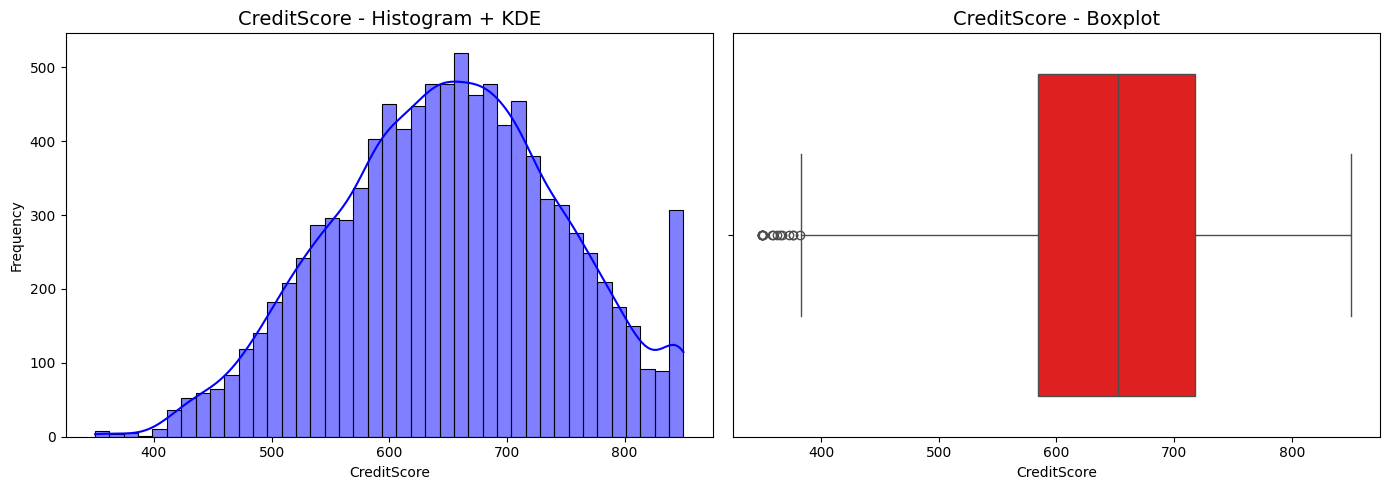

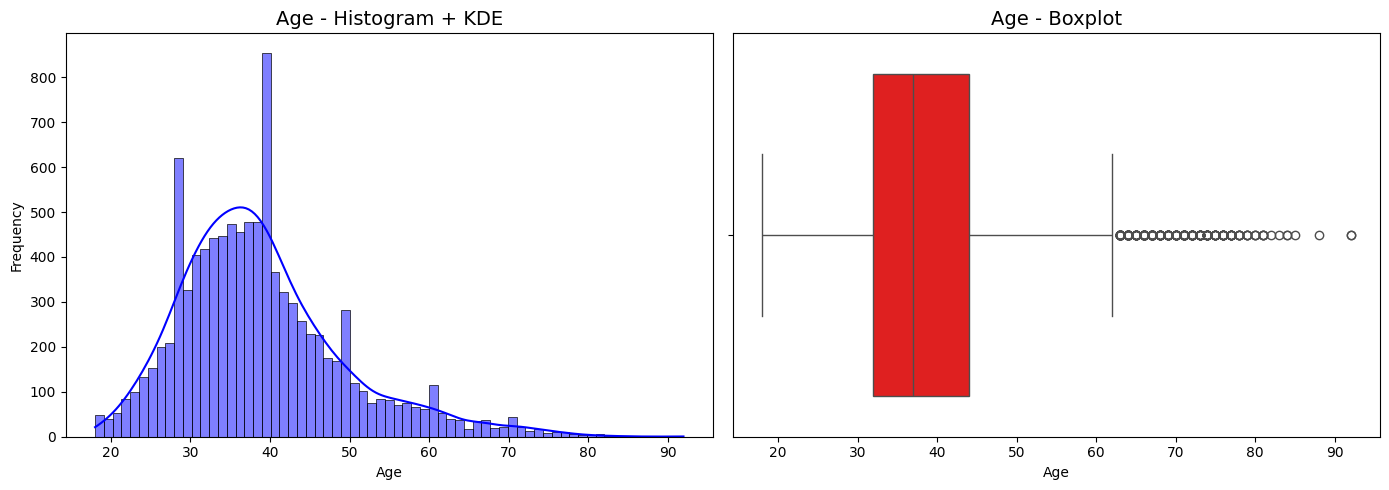

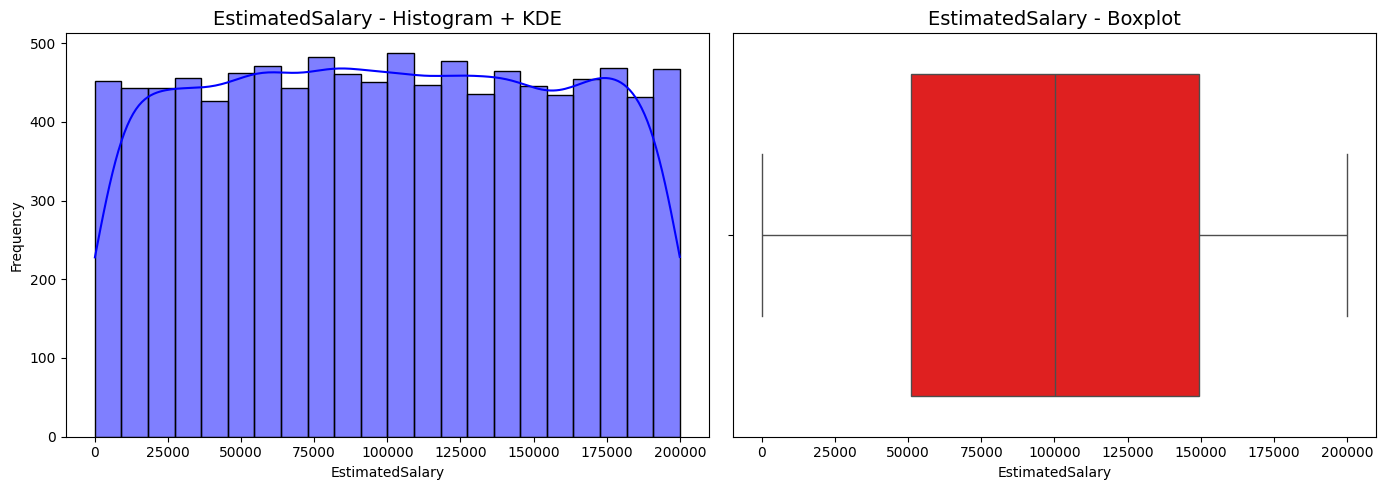

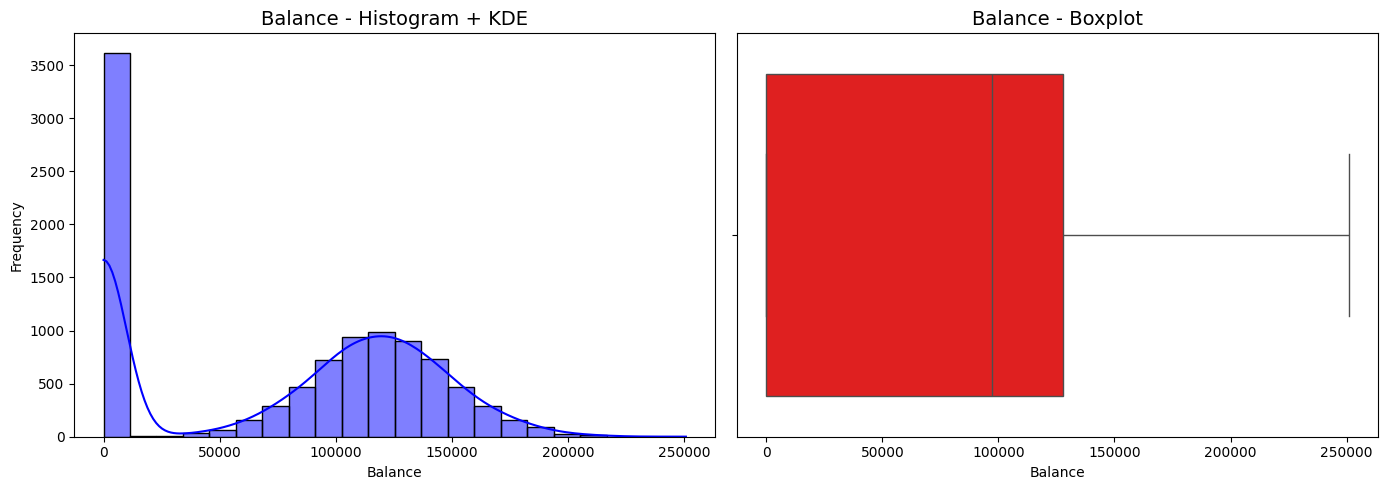

In [13]:
numerical_cols = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']

for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"{col} - Histogram + KDE", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='red')
    plt.title(f"{col} - Boxplot", fontsize=14)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


### 📊 Numerical Features - Univariate Insights

- **CreditScore**: Concentrated between 600–750; slightly left-skewed; no major outliers.
- **Age**: Right-skewed; concentrated around 30–40 years; outliers present above 60.
- **EstimatedSalary**: Fairly uniform distribution; no noticeable skew or outliers.
- **Balance**: Many customers have zero balance (not outliers); rest are right-skewed with some high values.


### 🎯 Bivariate Analysis

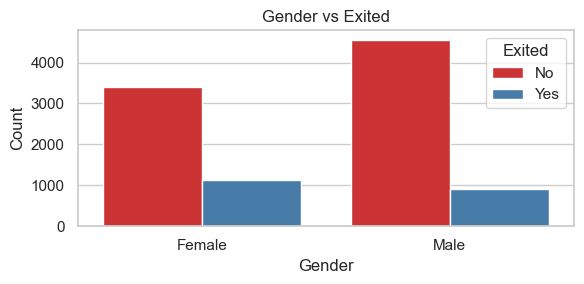

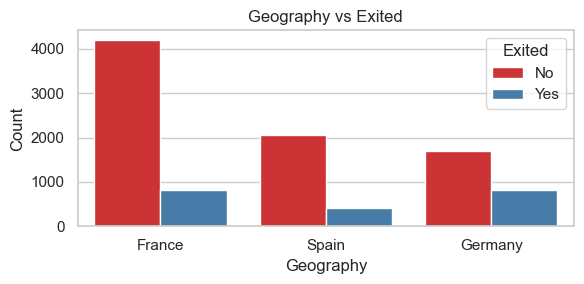

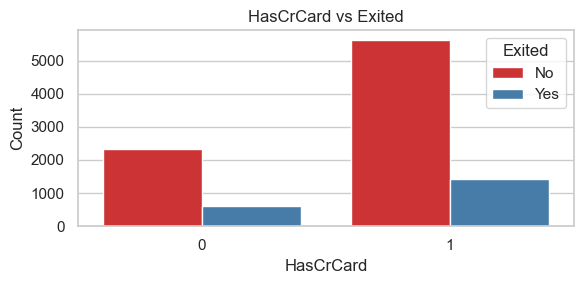

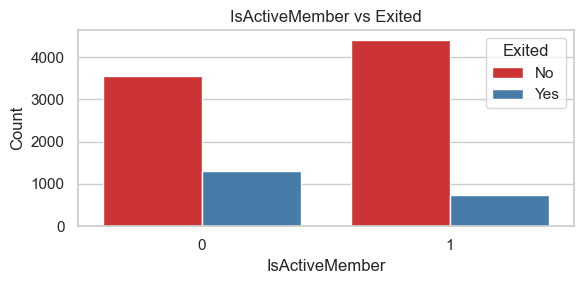

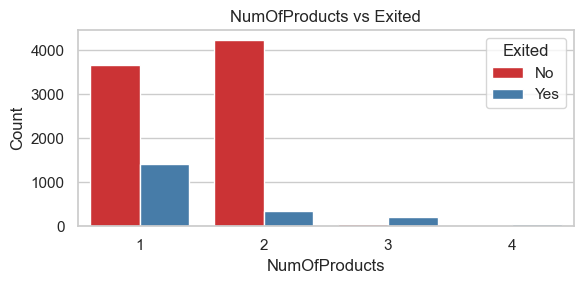

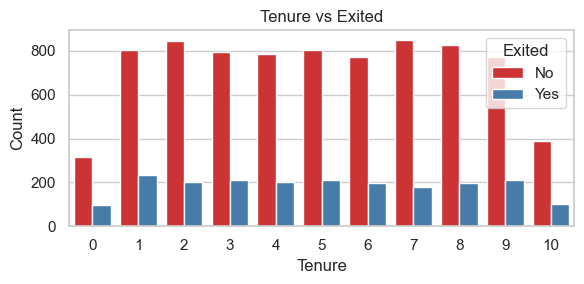

In [14]:
# Set plot style
sns.set(style='whitegrid')
categorical_cols = ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure']

# Plot countplots with hue='Exited'
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    ax = sns.countplot(data=df, x=col, hue='Exited', palette='Set1')
    plt.title(f'{col} vs Exited')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Exited", labels=["No", "Yes"])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


### 📊 Bivariate Analysis: Categorical Features vs Target (`Exited`)

- **Gender**: Females show a slightly higher churn rate compared to males.
- **Geography**: Customers from *Germany* have the highest churn rate, whereas *Spain* has the lowest.
- **HasCrCard**: No significant impact of having a credit card on churn.
- **IsActiveMember**: Inactive members have a much higher tendency to churn.
- **NumOfProducts**: Customers with only 1 product are more likely to churn. Those with 3+ products show increased churn as well.
- **Tenure**: Churn seems spread across all tenure values, though mid-tenure values have slightly more churn.

> ✅ These insights help identify which customer segments are more prone to churn and can guide targeted retention strategies.


In [15]:

numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for col in numerical_cols:
    fig = px.box(df, x='Exited', y=col, color='Exited',
                 title=f"{col} vs Exited",
                 color_discrete_sequence=px.colors.qualitative.Set1,
                 width=600, height=400,
                 points="all")  # show all individual data points
    fig.update_layout(
        xaxis_title="Exited (0 = Not Churned, 1 = Churned)",
        yaxis_title=col,
        title_font=dict(size=20),
        boxmode='group'
    )
    fig.show()


### 📊 Bivariate Analysis: Numerical Features vs Target (`Exited`)

- **Credit Score**: Lower credit scores show a slightly higher tendency to churn.
- **Age**: Older customers (especially >40) show a much higher churn rate.
- **Balance**: Customers with high balance often belong to the churned group — possibly indicating withdrawal/inactivity.
- **Estimated Salary**: Distribution is similar across both groups; salary doesn’t clearly influence churn.

> 🔍 **Conclusion**: Age and Balance are strong churn indicators. Credit Score also shows mild influence. Estimated Salary appears neutral.


### 🎯 Multivariate Analysis : Heatmap

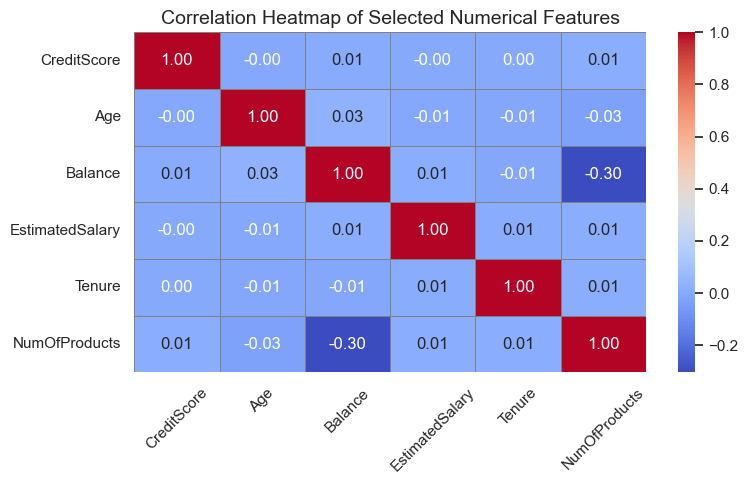

In [16]:
# Select only the numerical features relevant for correlation analysis
selected_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

# Compute correlation matrix
corr_matrix = df[selected_cols].corr()

# Set figure size and style
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot the heatmap with annotations and better aesthetics
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='grey')

# Title and layout adjustments
plt.title('Correlation Heatmap of Selected Numerical Features', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔍 Correlation Heatmap Analysis

As observed from the correlation heatmap, most features have very low correlation with each other. The correlation values are close to zero, indicating weak or no linear relationship among them.

- No pair of features shows strong positive or negative correlation.
- The highest correlation is between `Balance` and `NumOfProducts`, which is moderate (around -0.30), but not strong enough to consider multicollinearity.

📌 **Conclusion:**  
There is **no significant correlation** between the features, and hence, **no multicollinearity issue** is present. We will not apply any correlation-based feature removal further.


## 4. Data Pre-processing:

1. **Drop Irrelevant Columns**  
   - Remove `RowNumber`, `CustomerId`, `Surname` as they do not contribute to model learning.

2. **Handle Missing Values**  
   - No missing values in the dataset, so we skip this step.

3. **Encode Categorical Variables**  
   - `Geography`: Apply **One-Hot Encoding**  
   - `Gender`: Apply **Binary Encoding** (Male = 1, Female = 0)

4. **Outlier Detection & Removal (Optional)**  
   - Use IQR or Z-score method on numerical features like `Age`, `CreditScore`, `Balance` etc.

5. **Input Output Feature selection**
6. **Train test Split**

7. **Feature Scaling**  
   - Apply **StandardScaler** to numerical columns to normalize feature ranges.

8. **Handle Class Imbalance**  
   - Analyze the target variable `Exited`  
   - If imbalance exists, apply **SMOTE** or use **class weights**





In [17]:
# Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Encoding of Gender and Geography Columns

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Fit and transform the 'Gender' column
df['Gender'] = le.fit_transform(df['Gender'])

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# One-hot encoding for 'Geography' column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [22]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [23]:
df = df.astype({col: int for col in df.select_dtypes(bool).columns})


In [24]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


Outlier Removal

In [25]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Columns to check
for col in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    df = remove_outliers_iqr(df, col)


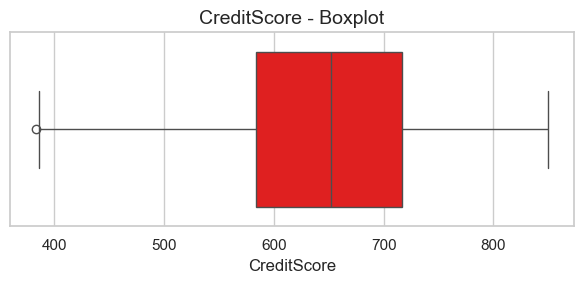

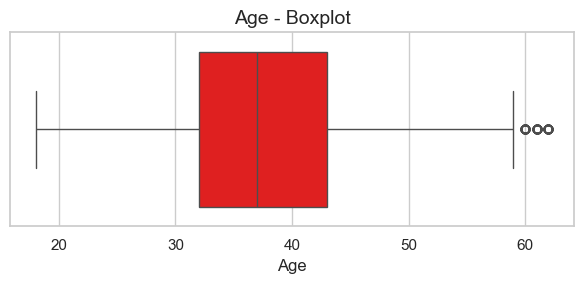

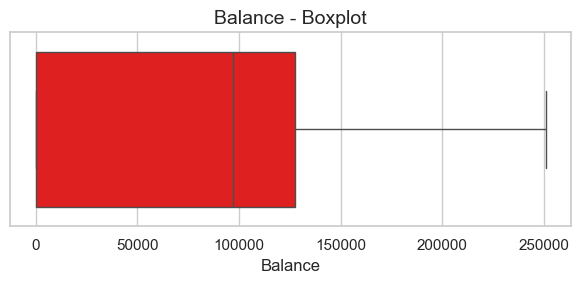

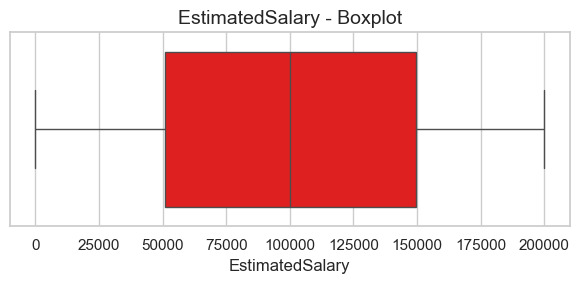

In [26]:
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for col in numerical_cols:
    plt.figure(figsize=(6, 3))

    # Boxplot
    sns.boxplot(x=df[col], color='red')
    plt.title(f"{col} - Boxplot", fontsize=14)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

No outliers now!!

Input Output Feature Selection & Train-Test Split

In [27]:
y = df["Exited"]
X = df.drop("Exited", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0


In [29]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9626, dtype: int64

Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the scaler
scaler = StandardScaler()

# Step 2: Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Transform test data using same scaler (don't fit again!)
X_test_scaled = scaler.transform(X_test)


In [31]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
2790,540,1,39,4,127278.31,1,1,1,16150.34,1,0
1322,700,0,44,2,58781.76,1,1,0,16874.92,0,0
4886,711,0,53,5,123805.03,1,1,0,102428.51,1,0
1779,703,1,36,2,0.00,2,1,0,108790.95,0,0
8093,584,1,47,5,0.00,2,1,0,89286.29,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2024,545,0,39,6,0.00,1,0,0,38410.74,0,1
160,717,0,22,6,101060.25,1,0,1,84699.56,0,1
9251,541,0,39,6,109844.81,1,1,0,25289.23,0,0
9497,684,0,25,1,0.00,2,0,1,144978.47,0,0


In [32]:
X_train_scaled

array([[-1.14682626,  0.91358842,  0.13759542, ..., -1.46765448,
         1.73807012, -0.57675042],
       [ 0.51258792, -1.09458481,  0.70501438, ..., -1.45505299,
        -0.57535078, -0.57675042],
       [ 0.62667265, -1.09458481,  1.72636852, ...,  0.03284676,
         1.73807012, -0.57675042],
       ...,
       [-1.13645492, -1.09458481,  0.13759542, ..., -1.30871606,
        -0.57535078, -0.57675042],
       [ 0.3466465 , -1.09458481, -1.45117769, ...,  0.77285165,
        -0.57535078, -0.57675042],
       [ 0.22219044,  0.91358842,  1.04546576, ..., -0.15591275,
        -0.57535078, -0.57675042]])

Handling Class Imbalance

In [33]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

Exited
0    7677
1    1949
Name: count, dtype: int64
Exited
0    6141
1    1559
Name: count, dtype: int64
Exited
0    1536
1     390
Name: count, dtype: int64


In [34]:
def classImbalanceCheck(y):
    plt.figure(figsize=(6, 3)) 

    # Get counts
    counts = y.value_counts()
    indexes = counts.index.astype(int)  # ensure they are int

    # Plot
    plt.barh(indexes, counts.values, color=['blue', 'orange'], height=0.4, edgecolor='black')
    plt.title("Class Distribution")
    plt.xlabel("Count")
    plt.ylabel("Exited (0 = Not Churned, 1 = Churned)")

    # Manually set ticks
    plt.yticks([0, 1], ['Not Churned (0)', 'Churned (1)'])  # fixed labels
    plt.show()



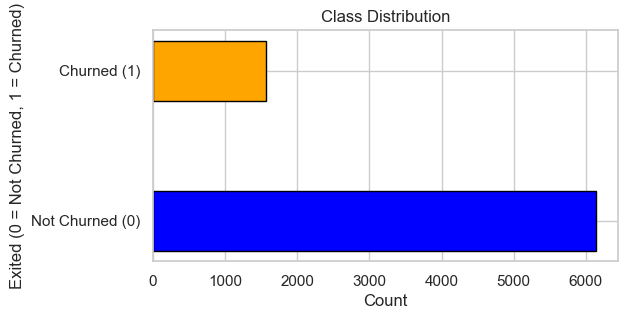

In [35]:
classImbalanceCheck(y_train)

**SMOTE:**

SMOTE = Synthetic Minority Over-sampling Technique
It works by:


- Creating synthetic examples (not duplicates) of the minority class
- Works only on training data
- Helps balance the classes for fair learning



- SMOTE uses distance-based interpolation, so scaling first is mandatory
- Never apply SMOTE on test data — that would again be data leakage
- The test set should remain unchanged and imbalanced, to reflect real-world distribution






In [38]:
from imblearn.over_sampling import SMOTE

In [40]:
# 1. Create SMOTE object
smote = SMOTE(random_state=42)

# 2. Apply SMOTE only to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


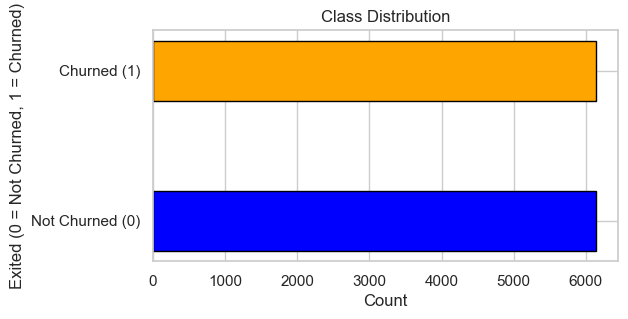

In [41]:
classImbalanceCheck(y_train_resampled)

## Model Building : Artificial Neural Network

Importing necessary libraries

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryFocalCrossentropy

Layering the model

In [89]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Drop 30% of neurons
    Dense(32, activation='relu'),
    Dropout(0.2),  # Drop 20% of neurons
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])



**Compiling the model**

optimizer='adam'
Adaptive learning rate optimization algorithm. Works well in most deep learning problems.

loss='binary_crossentropy'
Used for binary classification problems (since we have 0/1 output).

metrics=['accuracy']
To track how well the model is doing during training

In [108]:
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate
model.compile(optimizer=optimizer, loss=BinaryFocalCrossentropy(gamma=2.0, from_logits=False) , metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-traina

Training the ANN model

In [113]:
# Fit the ANN to the Resampled Training set
history = model.fit(X_train_resampled, y_train_resampled, batch_size=32, epochs=50)


Epoch 1/50
384/384 [==============================] - 1s 3ms/step - loss: 0.0984 - accuracy: 0.8222
Epoch 2/50
384/384 [==============================] - 1s 3ms/step - loss: 0.0973 - accuracy: 0.8224
Epoch 3/50
384/384 [==============================] - 1s 2ms/step - loss: 0.0981 - accuracy: 0.8245
Epoch 4/50
384/384 [==============================] - 1s 2ms/step - loss: 0.0975 - accuracy: 0.8266
Epoch 5/50
384/384 [==============================] - 1s 2ms/step - loss: 0.0968 - accuracy: 0.8276
Epoch 6/50
384/384 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.8241
Epoch 7/50
384/384 [==============================] - 1s 2ms/step - loss: 0.0978 - accuracy: 0.8275
Epoch 8/50
384/384 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.8221
Epoch 9/50
384/384 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.8220
Epoch 10/50
384/384 [==============================] - 1s 2ms/step - loss: 0.0961 - accuracy: 0.8275

Evaluation of Model

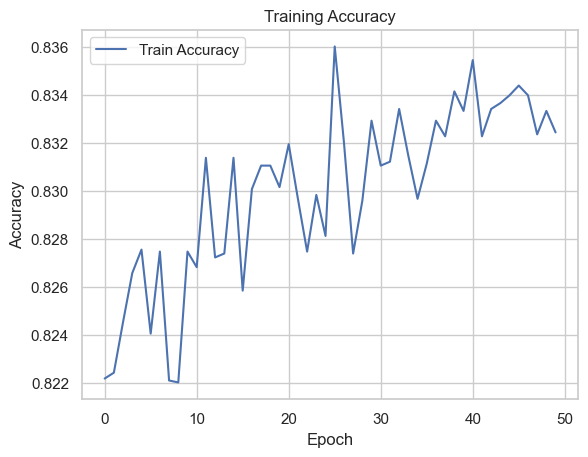

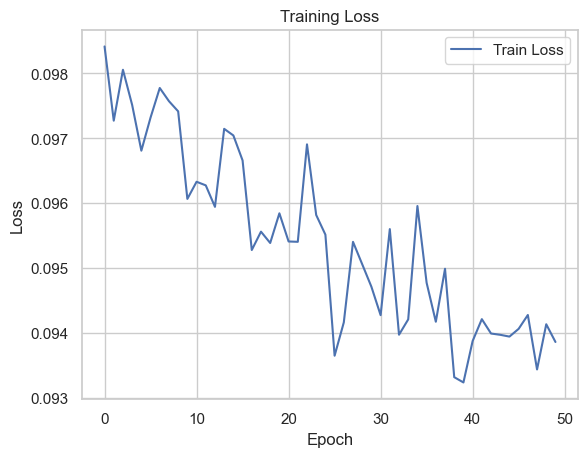

In [114]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [115]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


61/61 [==============================] - 0s 1ms/step - loss: 0.1141 - accuracy: 0.8017
Test Loss: 0.1141
Test Accuracy: 0.8017
